In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt    
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

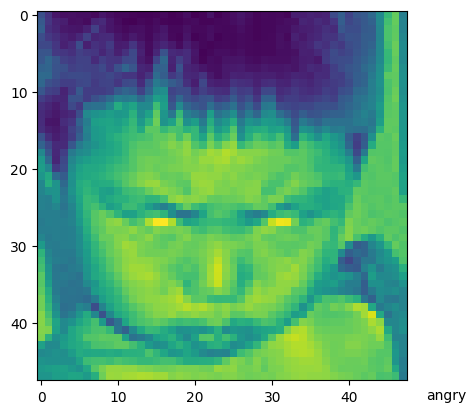

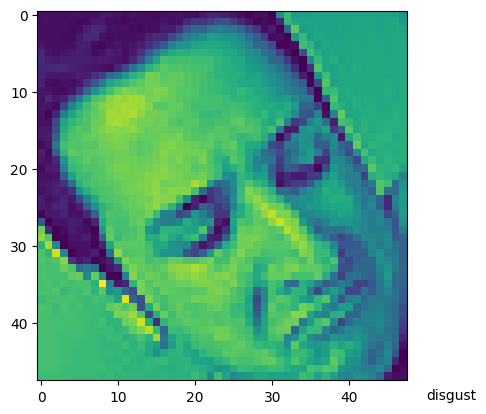

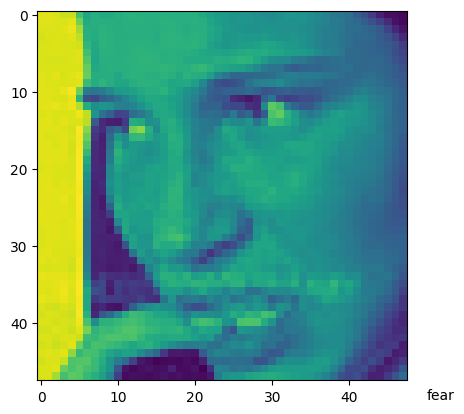

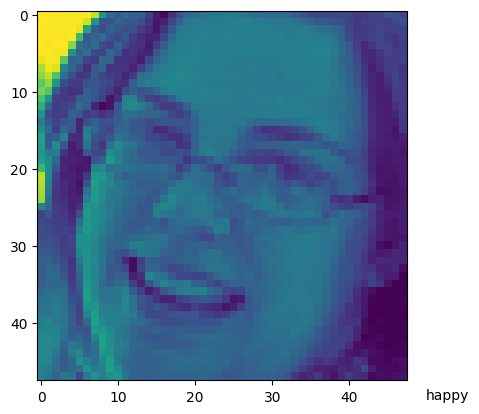

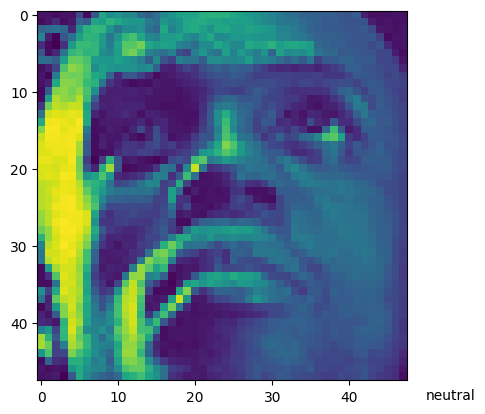

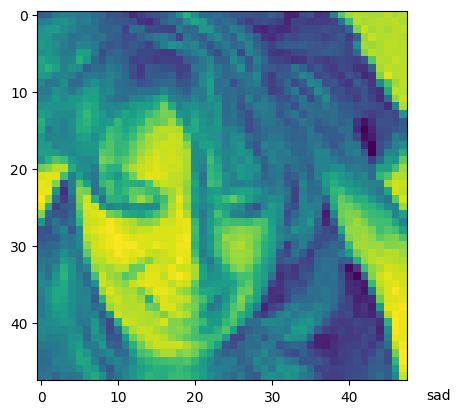

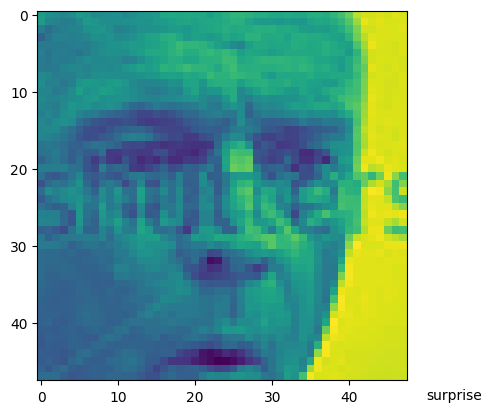

In [8]:
angry_path='archive/train/angry/Training_10118481.jpg'
angry_image=mpimg.imread(angry_path)
plt.imshow(angry_image)
plt.text(50,50,'angry')
plt.show()

angry_path='archive/train/angry/Training_10118481.jpg'
disgust_path='archive/train/disgust/Training_10371709.jpg'
fear_path='archive/train/fear/Training_10018621.jpg'
happy_path='archive/train/happy/Training_10019449.jpg'
neutral_path='archive/train/neutral/Training_10002154.jpg'
sad_path='archive/train/sad/Training_10022789.jpg'
surprise_path='archive/train/surprise/Training_10013223.jpg'

angry_image=mpimg.imread(angry_path)
disgust_image=mpimg.imread(disgust_path)
fear_image=mpimg.imread(fear_path)
happy_image=mpimg.imread(happy_path)
neutral_image=mpimg.imread(neutral_path)
sad_image=mpimg.imread(sad_path)
surprise_image=mpimg.imread(surprise_path)

plt.imshow(angry_image)
plt.text(50,50,'angry')
plt.show()
plt.imshow(disgust_image)
plt.text(50,50,'disgust')
plt.show()
plt.imshow(fear_image)
plt.text(50,50,'fear')
plt.show()
plt.imshow(happy_image)
plt.text(50,50,'happy')
plt.show()
plt.imshow(neutral_image)
plt.text(50,50,'neutral')
plt.show()
plt.imshow(sad_image)
plt.text(50,50,'sad')
plt.show()
plt.imshow(surprise_image)
plt.text(50,50,'surprise')
plt.show()


In [9]:
train_data_gen=ImageDataGenerator(rescale=1./255)
validation_data_gen=ImageDataGenerator(rescale=1./255)

In [10]:
train_generator=train_data_gen.flow_from_directory(
    'archive/train',
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.


In [11]:
validation_generator=validation_data_gen.flow_from_directory(
    'archive/test',
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


In [12]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

model.summary()

2023-07-13 09:40:16.469113: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [6]:
model_train=model.fit(
    train_generator,
    steps_per_epoch=28719//64,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=7178//64
)

Epoch 1/20
448/448 [==============================] - 239s 528ms/step - loss: 1.7887 - accuracy: 0.2700 - val_loss: 1.6620 - val_accuracy: 0.3583
Epoch 2/20
448/448 [==============================] - 235s 524ms/step - loss: 1.6002 - accuracy: 0.3800 - val_loss: 1.5231 - val_accuracy: 0.4180
Epoch 3/20
448/448 [==============================] - 236s 527ms/step - loss: 1.5033 - accuracy: 0.4243 - val_loss: 1.4418 - val_accuracy: 0.4556
Epoch 4/20
448/448 [==============================] - 241s 537ms/step - loss: 1.4354 - accuracy: 0.4522 - val_loss: 1.3748 - val_accuracy: 0.4810
Epoch 5/20
448/448 [==============================] - 241s 538ms/step - loss: 1.3712 - accuracy: 0.4790 - val_loss: 1.3310 - val_accuracy: 0.4973
Epoch 6/20
448/448 [==============================] - 256s 571ms/step - loss: 1.3243 - accuracy: 0.4975 - val_loss: 1.2868 - val_accuracy: 0.5184
Epoch 7/20
448/448 [==============================] - 228s 509ms/step - loss: 1.2788 - accuracy: 0.5166 - val_loss: 1.2575 -

In [7]:
model_json=model.to_json()

In [9]:
with open('emotion_model.json',"w") as json_file:
  json_file.write(model_json)

In [10]:
model.save_weights('emotion_model.h5')